**Data Analysis Final Project_ Bank Customer Analysis**

***Project on Bank Customers Details comprising of customer information (e.g., Name, Customer ID), financial performance indicators (e.g., Credit Score, Balance), customer engagement metrics (e.g., Tenure, Number of Products, IsActiveMember) and Customer's status (exited the bank or Active)***

**Problem Statement**

 -Analyze the dataset to gain insights into customer behavior
 
 -Financial standing
 
 -Engagement patterns.

In [1191]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [1192]:
Bank_Data_Set_Cust_Info=pd.read_csv('Bank_Churn_Messy.xlsx - Customer_Info.csv')

In [1193]:
Bank_Data_Set_Cust_Info

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88
1,15647311,Hill,608,Spain,Female,41.0,1,€112542.58
2,15619304,Onio,502,French,Female,42.0,8,€113931.57
3,15701354,Boni,699,FRA,Female,39.0,1,€93826.63
4,15737888,Mitchell,850,Spain,Female,43.0,2,€79084.1
...,...,...,...,...,...,...,...,...
9996,15569892,Johnstone,516,French,Male,35.0,10,€101699.77
9997,15584532,Liu,709,FRA,Female,36.0,7,€42085.58
9998,15682355,Sabbatini,772,Germany,Male,42.0,3,€92888.52
9999,15628319,Walker,792,French,Female,28.0,4,€38190.78


In [1194]:
Bank_Data_Set_Acc_Info=pd.read_csv('Bank_Churn_Messy.xlsx - Account_Info.csv')

In [1195]:
Bank_Data_Set_Acc_Info

,CustomerId,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited
0,15634602,€0.0,1,Yes,2,Yes,1
1,15634602,€0.0,1,Yes,2,Yes,1
2,15647311,€83807.86,1,Yes,1,Yes,0
3,15619304,€159660.8,3,No,8,No,1
4,15701354,€0.0,2,No,1,No,0
...,...,...,...,...,...,...,...
9997,15569892,€57369.61,1,Yes,10,Yes,0
9998,15584532,€0.0,1,Yes,7,Yes,1
9999,15682355,€75075.31,2,No,3,No,1
10000,15628319,€130142.79,1,No,4,No,0


In [1196]:
comb_Bank_Cust_Data=pd.merge(Bank_Data_Set_Cust_Info,Bank_Data_Set_Acc_Info, on='CustomerId', how='left')

In [1197]:
comb_Bank_Cust_Data

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure_x,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure_y,IsActiveMember,Exited
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88,€0.0,1,Yes,2,Yes,1
1,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88,€0.0,1,Yes,2,Yes,1
2,15647311,Hill,608,Spain,Female,41.0,1,€112542.58,€83807.86,1,Yes,1,Yes,0
3,15619304,Onio,502,French,Female,42.0,8,€113931.57,€159660.8,3,No,8,No,1
4,15701354,Boni,699,FRA,Female,39.0,1,€93826.63,€0.0,2,No,1,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999,15682355,Sabbatini,772,Germany,Male,42.0,3,€92888.52,€75075.31,2,No,3,No,1
10000,15628319,Walker,792,French,Female,28.0,4,€38190.78,€130142.79,1,No,4,No,0
10001,15628319,Walker,792,French,Female,28.0,4,€38190.78,€130142.79,1,No,4,No,0
10002,15628319,Walker,792,French,Female,28.0,4,€38190.78,€130142.79,1,No,4,No,0


In [1198]:
comb_Bank_Cust_Data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure_x,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure_y,IsActiveMember,Exited
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88,€0.0,1,Yes,2,Yes,1
1,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88,€0.0,1,Yes,2,Yes,1
2,15647311,Hill,608,Spain,Female,41.0,1,€112542.58,€83807.86,1,Yes,1,Yes,0
3,15619304,Onio,502,French,Female,42.0,8,€113931.57,€159660.8,3,No,8,No,1
4,15701354,Boni,699,FRA,Female,39.0,1,€93826.63,€0.0,2,No,1,No,0


In [1199]:
comb_Bank_Cust_Data.tail()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure_x,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure_y,IsActiveMember,Exited
9999,15682355,Sabbatini,772,Germany,Male,42.0,3,€92888.52,€75075.31,2,No,3,No,1
10000,15628319,Walker,792,French,Female,28.0,4,€38190.78,€130142.79,1,No,4,No,0
10001,15628319,Walker,792,French,Female,28.0,4,€38190.78,€130142.79,1,No,4,No,0
10002,15628319,Walker,792,French,Female,28.0,4,€38190.78,€130142.79,1,No,4,No,0
10003,15628319,Walker,792,French,Female,28.0,4,€38190.78,€130142.79,1,No,4,No,0


In [1200]:
Bank_data_dictionary=pd.read_csv('Bank_Churn_Data_Dictionary.csv')


In [1201]:
Bank_data_dictionary

,Field,Description
0,CustomerId,A unique identifier for each customer
1,Surname,The customer's last name
2,CreditScore,A numerical value representing the customer's ...
3,Geography,The country where the customer resides (France...
4,Gender,The customer's gender (Male or Female)
5,Age,The customer's age
6,Tenure,The number of years the customer has been with...
7,Balance,The customer's account balance
8,NumOfProducts,The number of bank products the customer uses ...
9,HasCrCard,Whether the customer has a credit card (1 = ye...


**Data Exploration**

- Confirming your column
- Shape of your dataset
- Information details of your dataset

In [1204]:
comb_Bank_Cust_Data.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure_x', 'EstimatedSalary', 'Balance', 'NumOfProducts', 'HasCrCard',
       'Tenure_y', 'IsActiveMember', 'Exited'],
      dtype='object')

In [1205]:
comb_Bank_Cust_Data.shape

(10004, 14)

In [1206]:
comb_Bank_Cust_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10004 entries, 0 to 10003
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10004 non-null  int64  
 1   Surname          10001 non-null  object 
 2   CreditScore      10004 non-null  int64  
 3   Geography        10004 non-null  object 
 4   Gender           10004 non-null  object 
 5   Age              10001 non-null  float64
 6   Tenure_x         10004 non-null  int64  
 7   EstimatedSalary  10004 non-null  object 
 8   Balance          10004 non-null  object 
 9   NumOfProducts    10004 non-null  int64  
 10  HasCrCard        10004 non-null  object 
 11  Tenure_y         10004 non-null  int64  
 12  IsActiveMember   10004 non-null  object 
 13  Exited           10004 non-null  int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 1.1+ MB


##Data issue as seen from data information
- Surname and Age has 3 null values each
- Age, EstimatedSalary and Balance data type issue

In [1208]:
##For us to continue, it is advisable to create a copy of your dateset##

comb_Bank_Cust_Data_copy=comb_Bank_Cust_Data.copy()

In [1209]:
comb_Bank_Cust_Data_copy

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure_x,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure_y,IsActiveMember,Exited
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88,€0.0,1,Yes,2,Yes,1
1,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88,€0.0,1,Yes,2,Yes,1
2,15647311,Hill,608,Spain,Female,41.0,1,€112542.58,€83807.86,1,Yes,1,Yes,0
3,15619304,Onio,502,French,Female,42.0,8,€113931.57,€159660.8,3,No,8,No,1
4,15701354,Boni,699,FRA,Female,39.0,1,€93826.63,€0.0,2,No,1,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999,15682355,Sabbatini,772,Germany,Male,42.0,3,€92888.52,€75075.31,2,No,3,No,1
10000,15628319,Walker,792,French,Female,28.0,4,€38190.78,€130142.79,1,No,4,No,0
10001,15628319,Walker,792,French,Female,28.0,4,€38190.78,€130142.79,1,No,4,No,0
10002,15628319,Walker,792,French,Female,28.0,4,€38190.78,€130142.79,1,No,4,No,0


##Removing the Euro sign in EstimatedSalary and Balance column so i can change data type

In [1211]:
comb_Bank_Cust_Data['EstimatedSalary']=comb_Bank_Cust_Data['EstimatedSalary'].str.replace('€','')

In [1212]:
comb_Bank_Cust_Data['Balance']=comb_Bank_Cust_Data['Balance'].str.replace('€','')

In [1213]:
comb_Bank_Cust_Data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure_x,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure_y,IsActiveMember,Exited
0,15634602,Hargrave,619,FRA,Female,42.0,2,101348.88,0.0,1,Yes,2,Yes,1
1,15634602,Hargrave,619,FRA,Female,42.0,2,101348.88,0.0,1,Yes,2,Yes,1
2,15647311,Hill,608,Spain,Female,41.0,1,112542.58,83807.86,1,Yes,1,Yes,0
3,15619304,Onio,502,French,Female,42.0,8,113931.57,159660.8,3,No,8,No,1
4,15701354,Boni,699,FRA,Female,39.0,1,93826.63,0.0,2,No,1,No,0


In [1214]:
comb_Bank_Cust_Data.tail()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure_x,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure_y,IsActiveMember,Exited
9999,15682355,Sabbatini,772,Germany,Male,42.0,3,92888.52,75075.31,2,No,3,No,1
10000,15628319,Walker,792,French,Female,28.0,4,38190.78,130142.79,1,No,4,No,0
10001,15628319,Walker,792,French,Female,28.0,4,38190.78,130142.79,1,No,4,No,0
10002,15628319,Walker,792,French,Female,28.0,4,38190.78,130142.79,1,No,4,No,0
10003,15628319,Walker,792,French,Female,28.0,4,38190.78,130142.79,1,No,4,No,0


In [1215]:
comb_Bank_Cust_Data.isnull().sum()

CustomerId         0
Surname            3
CreditScore        0
Geography          0
Gender             0
Age                3
Tenure_x           0
EstimatedSalary    0
Balance            0
NumOfProducts      0
HasCrCard          0
Tenure_y           0
IsActiveMember     0
Exited             0
dtype: int64

In [1216]:
comb_Bank_Cust_Data.isnull().sum()/len(comb_Bank_Cust_Data)*100

CustomerId         0.000000
Surname            0.029988
CreditScore        0.000000
Geography          0.000000
Gender             0.000000
Age                0.029988
Tenure_x           0.000000
EstimatedSalary    0.000000
Balance            0.000000
NumOfProducts      0.000000
HasCrCard          0.000000
Tenure_y           0.000000
IsActiveMember     0.000000
Exited             0.000000
dtype: float64

In [1217]:
comb_Bank_Cust_Data[comb_Bank_Cust_Data['Surname'].isnull()]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure_x,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure_y,IsActiveMember,Exited
29,15728693,NaN,574,Germany,Female,NaN,3,-999999,141349.43,1,Yes,3,Yes,0
122,15580203,NaN,674,Spain,Male,NaN,6,-999999,120193.42,1,No,6,No,0
9390,15756954,NaN,538,France,Female,NaN,2,-999999,0.0,1,Yes,2,Yes,0


In [1218]:
comb_Bank_Cust_Data[comb_Bank_Cust_Data['Age'].isnull()]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure_x,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure_y,IsActiveMember,Exited
29,15728693,NaN,574,Germany,Female,NaN,3,-999999,141349.43,1,Yes,3,Yes,0
122,15580203,NaN,674,Spain,Male,NaN,6,-999999,120193.42,1,No,6,No,0
9390,15756954,NaN,538,France,Female,NaN,2,-999999,0.0,1,Yes,2,Yes,0


In [1219]:
comb_Bank_Cust_Data.dropna(axis=0,inplace=True)

In [1220]:
comb_Bank_Cust_Data.duplicated().sum()

4

In [1221]:
comb_Bank_Cust_Data_duplicates=comb_Bank_Cust_Data[comb_Bank_Cust_Data.duplicated('CustomerId')]

In [1222]:
comb_Bank_Cust_Data_duplicates

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure_x,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure_y,IsActiveMember,Exited
1,15634602,Hargrave,619,FRA,Female,42.0,2,101348.88,0.0,1,Yes,2,Yes,1
10001,15628319,Walker,792,French,Female,28.0,4,38190.78,130142.79,1,No,4,No,0
10002,15628319,Walker,792,French,Female,28.0,4,38190.78,130142.79,1,No,4,No,0
10003,15628319,Walker,792,French,Female,28.0,4,38190.78,130142.79,1,No,4,No,0


In [1223]:
comb_Bank_Cust_Data_drop_duplicates=comb_Bank_Cust_Data.drop_duplicates()

In [1224]:
comb_Bank_Cust_Data_drop_duplicates

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure_x,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure_y,IsActiveMember,Exited
0,15634602,Hargrave,619,FRA,Female,42.0,2,101348.88,0.0,1,Yes,2,Yes,1
2,15647311,Hill,608,Spain,Female,41.0,1,112542.58,83807.86,1,Yes,1,Yes,0
3,15619304,Onio,502,French,Female,42.0,8,113931.57,159660.8,3,No,8,No,1
4,15701354,Boni,699,FRA,Female,39.0,1,93826.63,0.0,2,No,1,No,0
5,15737888,Mitchell,850,Spain,Female,43.0,2,79084.1,125510.82,1,Yes,2,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,15606229,Obijiaku,771,France,Male,39.0,5,96270.64,0.0,2,No,5,No,0
9997,15569892,Johnstone,516,French,Male,35.0,10,101699.77,57369.61,1,Yes,10,Yes,0
9998,15584532,Liu,709,FRA,Female,36.0,7,42085.58,0.0,1,Yes,7,Yes,1
9999,15682355,Sabbatini,772,Germany,Male,42.0,3,92888.52,75075.31,2,No,3,No,1


In [1225]:
comb_Bank_Cust_Data.duplicated().value_counts()

False    9997
True        4
Name: count, dtype: int64

In [1226]:
comb_Bank_Cust_Data_drop_duplicates.duplicated().sum()

0

In [1227]:
comb_Bank_Cust_Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10001 entries, 0 to 10003
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10001 non-null  int64  
 1   Surname          10001 non-null  object 
 2   CreditScore      10001 non-null  int64  
 3   Geography        10001 non-null  object 
 4   Gender           10001 non-null  object 
 5   Age              10001 non-null  float64
 6   Tenure_x         10001 non-null  int64  
 7   EstimatedSalary  10001 non-null  object 
 8   Balance          10001 non-null  object 
 9   NumOfProducts    10001 non-null  int64  
 10  HasCrCard        10001 non-null  object 
 11  Tenure_y         10001 non-null  int64  
 12  IsActiveMember   10001 non-null  object 
 13  Exited           10001 non-null  int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 1.1+ MB


In [1228]:
comb_Bank_Cust_Data[comb_Bank_Cust_Data['Age'].isnull()]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure_x,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure_y,IsActiveMember,Exited


In [1229]:
comb_Bank_Cust_Data['Age'].isnull().sum()

0

In [1230]:
comb_Bank_Cust_Data['Age'] = comb_Bank_Cust_Data['Age'].astype('int64')

In [1231]:
comb_Bank_Cust_Data['Exited'] = comb_Bank_Cust_Data['Exited'].astype('int64')

In [1232]:
comb_Bank_Cust_Data['EstimatedSalary']=comb_Bank_Cust_Data['EstimatedSalary'].astype('float64')

In [1233]:
comb_Bank_Cust_Data['Balance']=comb_Bank_Cust_Data['Balance'].astype('float64')

In [1234]:
comb_Bank_Cust_Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10001 entries, 0 to 10003
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10001 non-null  int64  
 1   Surname          10001 non-null  object 
 2   CreditScore      10001 non-null  int64  
 3   Geography        10001 non-null  object 
 4   Gender           10001 non-null  object 
 5   Age              10001 non-null  int64  
 6   Tenure_x         10001 non-null  int64  
 7   EstimatedSalary  10001 non-null  float64
 8   Balance          10001 non-null  float64
 9   NumOfProducts    10001 non-null  int64  
 10  HasCrCard        10001 non-null  object 
 11  Tenure_y         10001 non-null  int64  
 12  IsActiveMember   10001 non-null  object 
 13  Exited           10001 non-null  int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 1.1+ MB


In [1413]:
comb_Bank_Cust_Data['Geography']=comb_Bank_Cust_Data['Geography'].replace({'FRA':'France','French':'France'})

In [1415]:
comb_Bank_Cust_Data['Geography']

0         France
1         France
2          Spain
3         France
4         France
          ...   
9999     Germany
10000     France
10001     France
10002     France
10003     France
Name: Geography, Length: 10001, dtype: object

In [1417]:
comb_Bank_Cust_Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10001 entries, 0 to 10003
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CustomerId       10001 non-null  int64   
 1   Surname          10001 non-null  object  
 2   CreditScore      10001 non-null  int64   
 3   Geography        10001 non-null  object  
 4   Gender           10001 non-null  object  
 5   Age              10001 non-null  int64   
 6   Tenure_x         10001 non-null  int64   
 7   EstimatedSalary  10001 non-null  float64 
 8   Balance          10001 non-null  float64 
 9   NumOfProducts    10001 non-null  int64   
 10  HasCrCard        0 non-null      float64 
 11  Tenure_y         10001 non-null  int64   
 12  IsActiveMember   0 non-null      float64 
 13  Exited           10001 non-null  int64   
 14  Age_Category     10001 non-null  category
 15  Segment          10001 non-null  object  
dtypes: category(1), float64(4), int64(7), object(

In [1419]:
comb_Bank_Cust_Data

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure_x,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure_y,IsActiveMember,Exited,Age_Category,Segment
0,15634602,Hargrave,619,France,Female,42,2,101348.88,0.00,1,NaN,2,NaN,1,40-49,low_balance_customers
1,15634602,Hargrave,619,France,Female,42,2,101348.88,0.00,1,NaN,2,NaN,1,40-49,low_balance_customers
2,15647311,Hill,608,Spain,Female,41,1,112542.58,83807.86,1,NaN,1,NaN,0,40-49,low_balance_customers
3,15619304,Onio,502,France,Female,42,8,113931.57,159660.80,3,NaN,8,NaN,1,40-49,high_balance_customers
4,15701354,Boni,699,France,Female,39,1,93826.63,0.00,2,NaN,1,NaN,0,30-39,low_balance_customers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999,15682355,Sabbatini,772,Germany,Male,42,3,92888.52,75075.31,2,NaN,3,NaN,1,40-49,low_balance_customers
10000,15628319,Walker,792,France,Female,28,4,38190.78,130142.79,1,NaN,4,NaN,0,<30,high_balance_customers
10001,15628319,Walker,792,France,Female,28,4,38190.78,130142.79,1,NaN,4,NaN,0,<30,high_balance_customers
10002,15628319,Walker,792,France,Female,28,4,38190.78,130142.79,1,NaN,4,NaN,0,<30,high_balance_customers


In [1421]:
comb_Bank_Cust_Data.describe()

,CustomerId,CreditScore,Age,Tenure_x,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure_y,IsActiveMember,Exited
count,1.000100e+04,10001.000000,10001.000000,10001.000000,10001.000000,10001.000000,10001.000000,0.0,10001.000000,0.0,10001.000000
mean,1.569092e+07,650.584642,38.919108,5.012599,100073.779733,76491.128727,1.530147,NaN,5.012599,NaN,0.203780
std,7.193043e+04,96.670158,10.488725,2.891996,57517.263050,62396.304066,0.581649,NaN,2.891996,NaN,0.402827
min,1.556570e+07,350.000000,18.000000,0.000000,11.580000,0.000000,1.000000,NaN,0.000000,NaN,0.000000
25%,1.562842e+07,584.000000,32.000000,3.000000,50911.410000,0.000000,1.000000,NaN,3.000000,NaN,0.000000
50%,1.569070e+07,652.000000,37.000000,5.000000,100200.400000,97208.460000,1.000000,NaN,5.000000,NaN,0.000000
75%,1.575322e+07,718.000000,44.000000,7.000000,149384.430000,127655.220000,2.000000,NaN,7.000000,NaN,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,199992.480000,250898.090000,4.000000,NaN,10.000000,NaN,1.000000


In [1423]:
comb_Bank_Cust_Data

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure_x,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure_y,IsActiveMember,Exited,Age_Category,Segment
0,15634602,Hargrave,619,France,Female,42,2,101348.88,0.00,1,NaN,2,NaN,1,40-49,low_balance_customers
1,15634602,Hargrave,619,France,Female,42,2,101348.88,0.00,1,NaN,2,NaN,1,40-49,low_balance_customers
2,15647311,Hill,608,Spain,Female,41,1,112542.58,83807.86,1,NaN,1,NaN,0,40-49,low_balance_customers
3,15619304,Onio,502,France,Female,42,8,113931.57,159660.80,3,NaN,8,NaN,1,40-49,high_balance_customers
4,15701354,Boni,699,France,Female,39,1,93826.63,0.00,2,NaN,1,NaN,0,30-39,low_balance_customers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999,15682355,Sabbatini,772,Germany,Male,42,3,92888.52,75075.31,2,NaN,3,NaN,1,40-49,low_balance_customers
10000,15628319,Walker,792,France,Female,28,4,38190.78,130142.79,1,NaN,4,NaN,0,<30,high_balance_customers
10001,15628319,Walker,792,France,Female,28,4,38190.78,130142.79,1,NaN,4,NaN,0,<30,high_balance_customers
10002,15628319,Walker,792,France,Female,28,4,38190.78,130142.79,1,NaN,4,NaN,0,<30,high_balance_customers


In [1425]:
comb_Bank_Cust_Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10001 entries, 0 to 10003
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CustomerId       10001 non-null  int64   
 1   Surname          10001 non-null  object  
 2   CreditScore      10001 non-null  int64   
 3   Geography        10001 non-null  object  
 4   Gender           10001 non-null  object  
 5   Age              10001 non-null  int64   
 6   Tenure_x         10001 non-null  int64   
 7   EstimatedSalary  10001 non-null  float64 
 8   Balance          10001 non-null  float64 
 9   NumOfProducts    10001 non-null  int64   
 10  HasCrCard        0 non-null      float64 
 11  Tenure_y         10001 non-null  int64   
 12  IsActiveMember   0 non-null      float64 
 13  Exited           10001 non-null  int64   
 14  Age_Category     10001 non-null  category
 15  Segment          10001 non-null  object  
dtypes: category(1), float64(4), int64(7), object(

In [1427]:
comb_Bank_Cust_Data

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure_x,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure_y,IsActiveMember,Exited,Age_Category,Segment
0,15634602,Hargrave,619,France,Female,42,2,101348.88,0.00,1,NaN,2,NaN,1,40-49,low_balance_customers
1,15634602,Hargrave,619,France,Female,42,2,101348.88,0.00,1,NaN,2,NaN,1,40-49,low_balance_customers
2,15647311,Hill,608,Spain,Female,41,1,112542.58,83807.86,1,NaN,1,NaN,0,40-49,low_balance_customers
3,15619304,Onio,502,France,Female,42,8,113931.57,159660.80,3,NaN,8,NaN,1,40-49,high_balance_customers
4,15701354,Boni,699,France,Female,39,1,93826.63,0.00,2,NaN,1,NaN,0,30-39,low_balance_customers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999,15682355,Sabbatini,772,Germany,Male,42,3,92888.52,75075.31,2,NaN,3,NaN,1,40-49,low_balance_customers
10000,15628319,Walker,792,France,Female,28,4,38190.78,130142.79,1,NaN,4,NaN,0,<30,high_balance_customers
10001,15628319,Walker,792,France,Female,28,4,38190.78,130142.79,1,NaN,4,NaN,0,<30,high_balance_customers
10002,15628319,Walker,792,France,Female,28,4,38190.78,130142.79,1,NaN,4,NaN,0,<30,high_balance_customers


In [1429]:
comb_Bank_Cust_Data['CustomerId'] = comb_Bank_Cust_Data['CustomerId'].astype('int64')

In [1431]:
comb_Bank_Cust_Data

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure_x,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure_y,IsActiveMember,Exited,Age_Category,Segment
0,15634602,Hargrave,619,France,Female,42,2,101348.88,0.00,1,NaN,2,NaN,1,40-49,low_balance_customers
1,15634602,Hargrave,619,France,Female,42,2,101348.88,0.00,1,NaN,2,NaN,1,40-49,low_balance_customers
2,15647311,Hill,608,Spain,Female,41,1,112542.58,83807.86,1,NaN,1,NaN,0,40-49,low_balance_customers
3,15619304,Onio,502,France,Female,42,8,113931.57,159660.80,3,NaN,8,NaN,1,40-49,high_balance_customers
4,15701354,Boni,699,France,Female,39,1,93826.63,0.00,2,NaN,1,NaN,0,30-39,low_balance_customers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999,15682355,Sabbatini,772,Germany,Male,42,3,92888.52,75075.31,2,NaN,3,NaN,1,40-49,low_balance_customers
10000,15628319,Walker,792,France,Female,28,4,38190.78,130142.79,1,NaN,4,NaN,0,<30,high_balance_customers
10001,15628319,Walker,792,France,Female,28,4,38190.78,130142.79,1,NaN,4,NaN,0,<30,high_balance_customers
10002,15628319,Walker,792,France,Female,28,4,38190.78,130142.79,1,NaN,4,NaN,0,<30,high_balance_customers


In [1433]:
comb_Bank_Cust_Data.to_csv('Cleaned Data.csv')

In [1435]:
comb_Bank_Cust_Data.to_excel('Cleaned Data.xlsx')

**Data Analysis**

*** 1. Demographic Analysis***

# .1A1. Distribution of customers based on geography

In [1436]:
Geography_counts = comb_Bank_Cust_Data['Geography'].value_counts()

In [1437]:
Geography_counts

Geography
France     5017
Germany    2508
Spain      2476
Name: count, dtype: int64

C:\Users\Janny Fredericks\AppData\Local\Temp\ipykernel_12184\3664966819.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(data=comb_Bank_Cust_Data, x='Geography', palette='viridis')


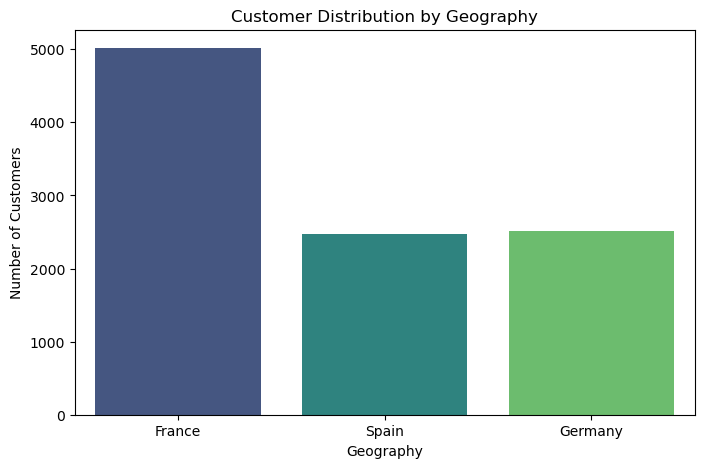

In [1441]:
##Plot distribution by Geography

plt.figure(figsize=(8, 5))
sb.countplot(data=comb_Bank_Cust_Data, x='Geography', palette='viridis')
plt.title("Customer Distribution by Geography")
plt.xlabel("Geography")
plt.ylabel("Number of Customers")
plt.show()

# 1B2. Distribution of customers based on gender

In [1443]:
Gender_counts = comb_Bank_Cust_Data['Gender'].value_counts()

In [1445]:
Gender_counts

Gender
Male      5456
Female    4545
Name: count, dtype: int64

C:\Users\Janny Fredericks\AppData\Local\Temp\ipykernel_12184\1706331431.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(data=comb_Bank_Cust_Data, x='Gender', palette='viridis')


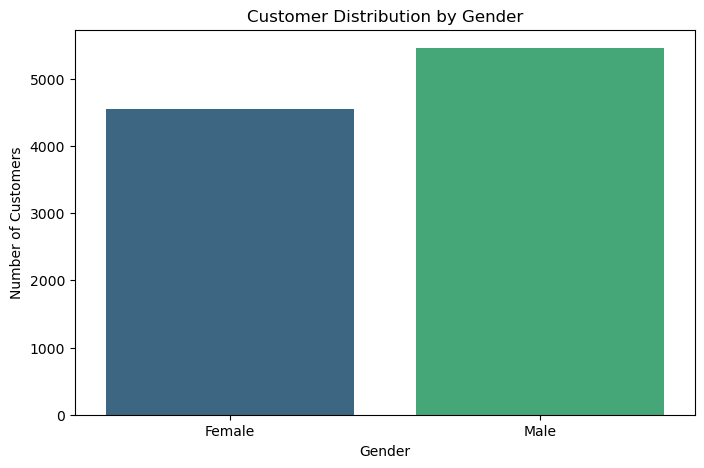

In [ ]:
# Plot distribution by Gender
plt.figure(figsize=(8, 5))
sb.countplot(data=comb_Bank_Cust_Data, x='Gender', palette='viridis')
plt.title("Customer Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Customers")
plt.show()

# 1A3.Distribution of customers based on Age

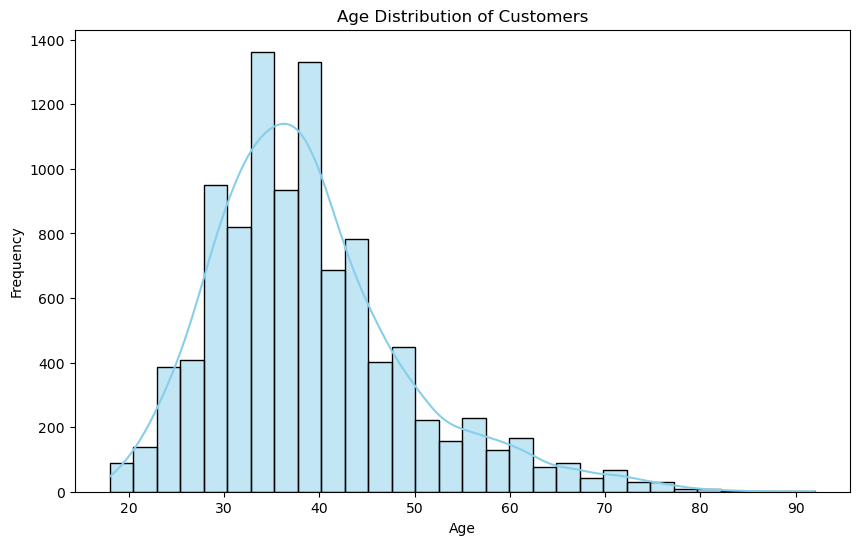

In [1449]:
plt.figure(figsize=(10, 6))
sb.histplot(comb_Bank_Cust_Data['Age'], kde=True, bins=30, color='skyblue')
plt.title("Age Distribution of Customers")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

In [1451]:
column_names = comb_Bank_Cust_Data.columns

In [1453]:
column_names 

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure_x', 'EstimatedSalary', 'Balance', 'NumOfProducts', 'HasCrCard',
       'Tenure_y', 'IsActiveMember', 'Exited', 'Age_Category', 'Segment'],
      dtype='object')

**1b.Demographic segments with significantly different financial metrics**

In [1457]:
# Calculate mean values of financial metrics grouped by Geography and Gender

demographic_metrics =comb_Bank_Cust_Data.groupby(['Geography', 'Gender']).agg({
    'CreditScore': 'mean',
    'Balance': 'mean',
    'EstimatedSalary': 'mean'
}).reset_index()

In [1459]:
demographic_metrics

,Geography,Gender,CreditScore,Balance,EstimatedSalary
0,France,Female,649.410777,60415.187986,99492.299541
1,France,Male,650.064657,63546.284875,100174.252495
2,Germany,Female,653.160235,119127.339404,102448.319253
3,Germany,Male,649.966565,120259.668222,99905.033959
4,Spain,Female,651.769513,59862.092534,100734.107475
5,Spain,Male,650.975487,63311.852790,98424.458219


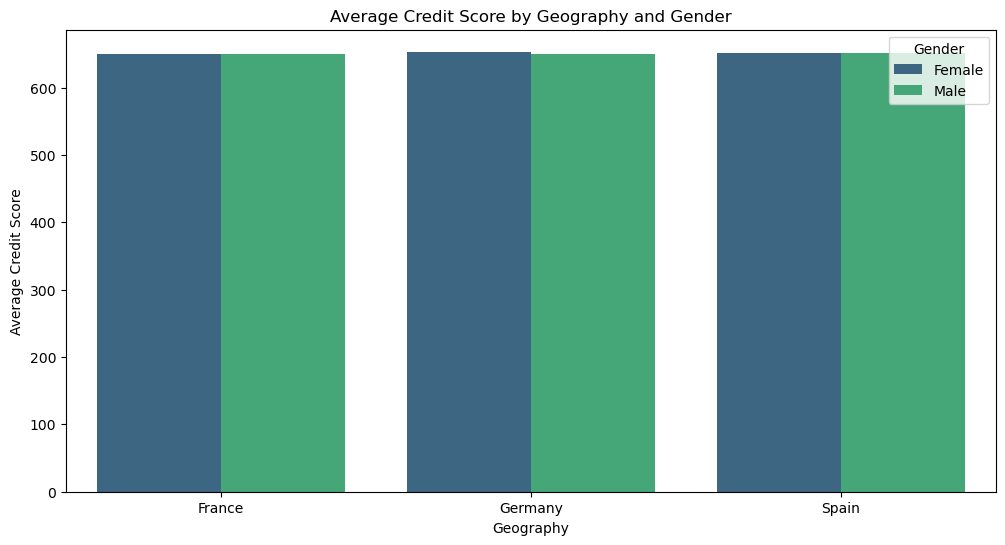

In [1461]:
# Plot financial metrics by Geography and Gender

plt.figure(figsize=(12, 6))
sb.barplot(data=demographic_metrics, x='Geography', y='CreditScore', hue='Gender', palette='viridis')
plt.title("Average Credit Score by Geography and Gender")
plt.xlabel("Geography")
plt.ylabel("Average Credit Score")
plt.legend(title="Gender")
plt.show()

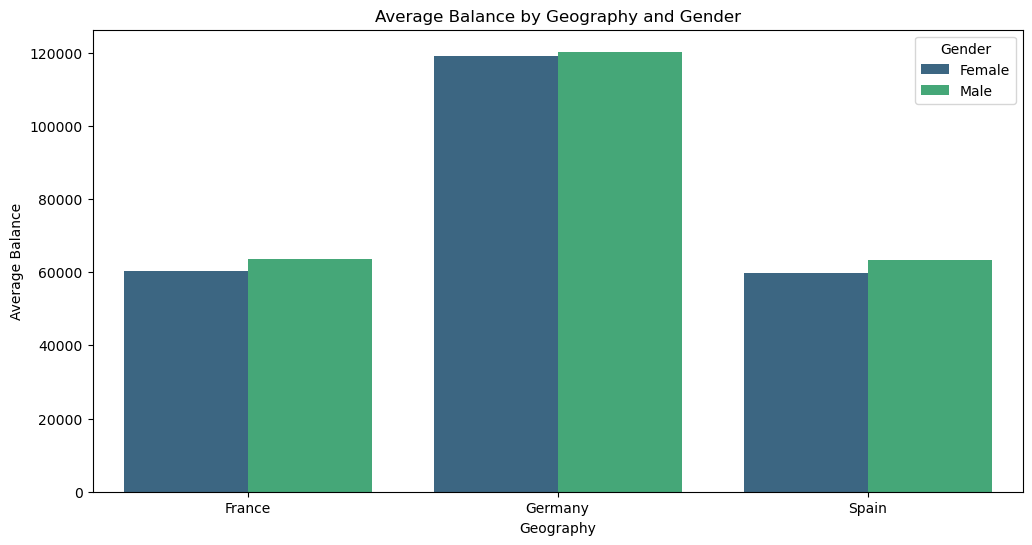

In [1463]:
plt.figure(figsize=(12, 6))
sb.barplot(data=demographic_metrics, x='Geography', y='Balance', hue='Gender', palette='viridis')
plt.title("Average Balance by Geography and Gender")
plt.xlabel("Geography")
plt.ylabel("Average Balance")
plt.legend(title="Gender")
plt.show()

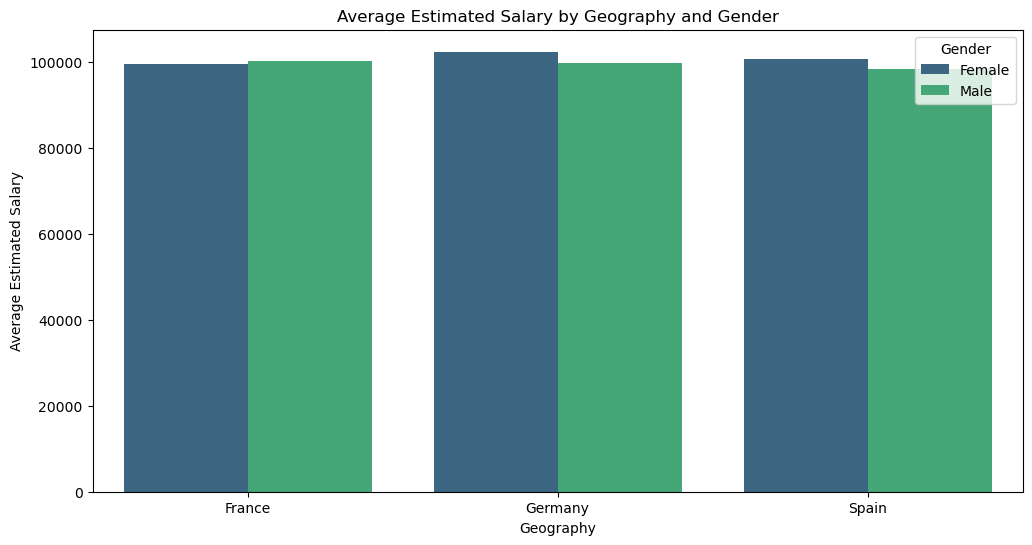

In [1465]:
plt.figure(figsize=(12, 6))
sb.barplot(data=demographic_metrics, x='Geography', y='EstimatedSalary', hue='Gender', palette='viridis')
plt.title("Average Estimated Salary by Geography and Gender")
plt.xlabel("Geography")
plt.ylabel("Average Estimated Salary")
plt.legend(title="Gender")
plt.show()

C:\Users\Janny Fredericks\AppData\Local\Temp\ipykernel_12184\3056539539.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(data=comb_Bank_Cust_Data, x='Tenure_y', y='NumOfProducts', palette='viridis')


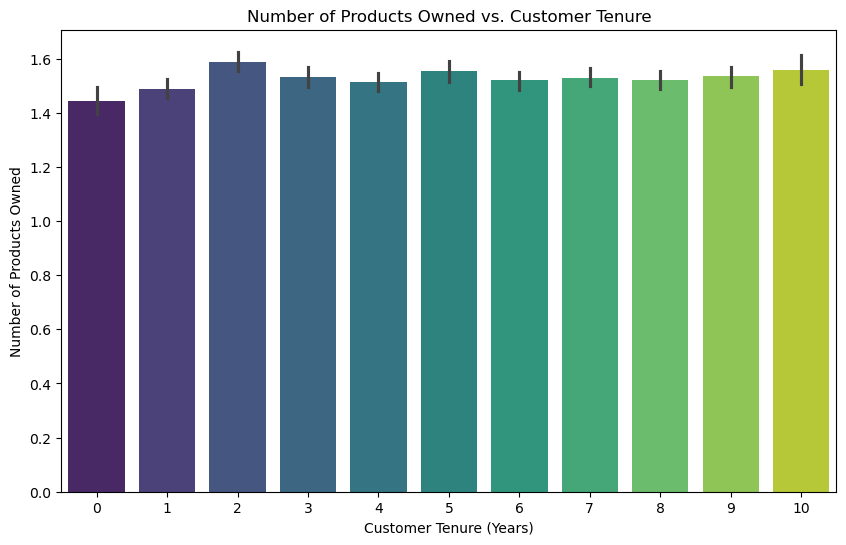

In [1469]:
# Plot Number of Products vs. Customer Tenure

plt.figure(figsize=(10, 6))
sb.barplot(data=comb_Bank_Cust_Data, x='Tenure_y', y='NumOfProducts', palette='viridis')
plt.title("Number of Products Owned vs. Customer Tenure")
plt.xlabel("Customer Tenure (Years)")
plt.ylabel("Number of Products Owned")
plt.show()

C:\Users\Janny Fredericks\AppData\Local\Temp\ipykernel_12184\1951067130.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sb.countplot(data=comb_Bank_Cust_Data, x='Tenure_x', hue='HasCrCard', palette='viridis')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


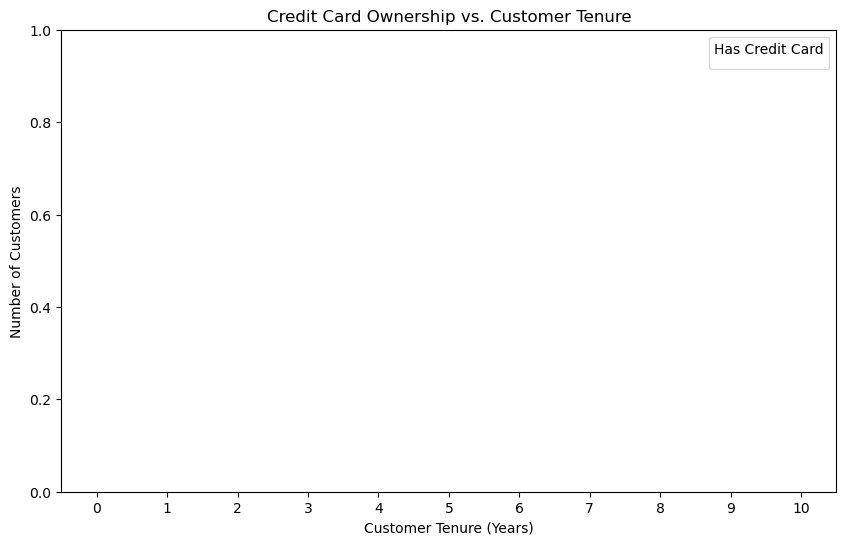

In [1543]:
# Plot HasCrCard vs. Customer Tenure
plt.figure(figsize=(10, 6))
sb.countplot(data=comb_Bank_Cust_Data, x='Tenure_x', hue='HasCrCard', palette='viridis')
plt.title("Credit Card Ownership vs. Customer Tenure")
plt.xlabel("Customer Tenure (Years)")
plt.ylabel("Number of Customers")
plt.legend(title="Has Credit Card")
plt.show()

C:\Users\Janny Fredericks\AppData\Local\Temp\ipykernel_12184\961104963.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sb.countplot(data=comb_Bank_Cust_Data, x='Tenure_x', hue='IsActiveMember', palette='viridis')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


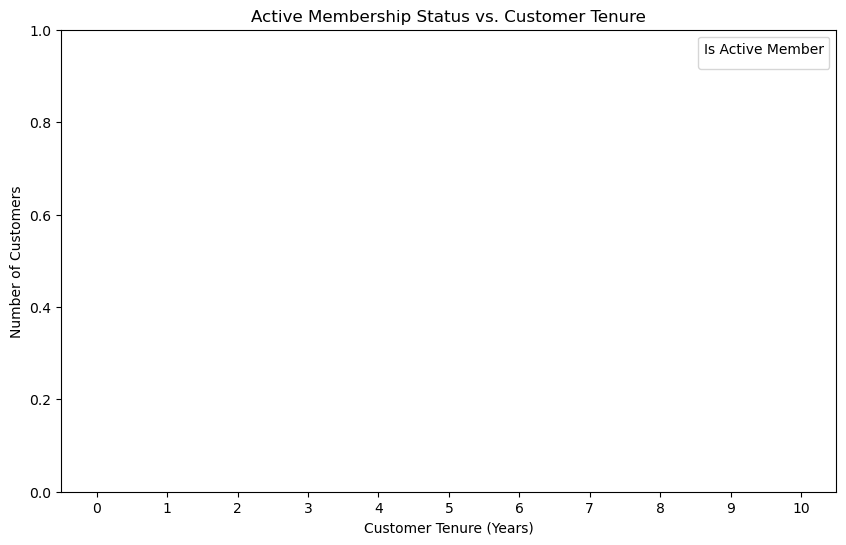

In [1473]:
# Plot IsActiveMember vs. Customer Tenure

plt.figure(figsize=(10, 6))
sb.countplot(data=comb_Bank_Cust_Data, x='Tenure_x', hue='IsActiveMember', palette='viridis')
plt.title("Active Membership Status vs. Customer Tenure")
plt.xlabel("Customer Tenure (Years)")
plt.ylabel("Number of Customers")
plt.legend(title="Is Active Member")
plt.show()

In [1477]:
# Convert 'HasCrCard' and 'IsActiveMember' to numeric (0 and 1) before aggregation

comb_Bank_Cust_Data['HasCrCard'] = comb_Bank_Cust_Data['HasCrCard'].map({'Yes': 1, 'No': 0})
comb_Bank_Cust_Data['IsActiveMember'] = comb_Bank_Cust_Data['IsActiveMember'].map({'Yes': 1, 'No': 0})

# 2. Impact of Tenure on Balance and Engagement Patterns

In [1479]:
# Convert 'HasCrCard' and 'IsActiveMember' to numeric (0 and 1) before aggregation

comb_Bank_Cust_Data['HasCrCard'] = comb_Bank_Cust_Data['HasCrCard'].map({'Yes': 1, 'No': 0})
comb_Bank_Cust_Data['IsActiveMember'] = comb_Bank_Cust_Data['IsActiveMember'].map({'Yes': 1, 'No': 0})

In [1481]:
# Calculate average balance and number of products owned by customer tenure

tenure_analysis =comb_Bank_Cust_Data.groupby('Tenure_x').agg({
    'Balance': 'mean',
    'NumOfProducts': 'mean',
    'HasCrCard': 'mean',
    'IsActiveMember': 'mean'
}).reset_index()

In [1483]:
tenure_analysis

,Tenure_x,Balance,NumOfProducts,HasCrCard,IsActiveMember
0,0,79878.910630,1.443099,NaN,NaN
1,1,78555.384222,1.489855,NaN,NaN
2,2,76839.626469,1.589695,NaN,NaN
3,3,77604.883919,1.533730,NaN,NaN
4,4,74229.001109,1.515121,NaN,NaN
5,5,76444.280860,1.554348,NaN,NaN
6,6,74356.541522,1.519669,NaN,NaN
7,7,75551.634426,1.530156,NaN,NaN
8,8,77936.598254,1.522927,NaN,NaN
9,9,76562.544014,1.535569,NaN,NaN


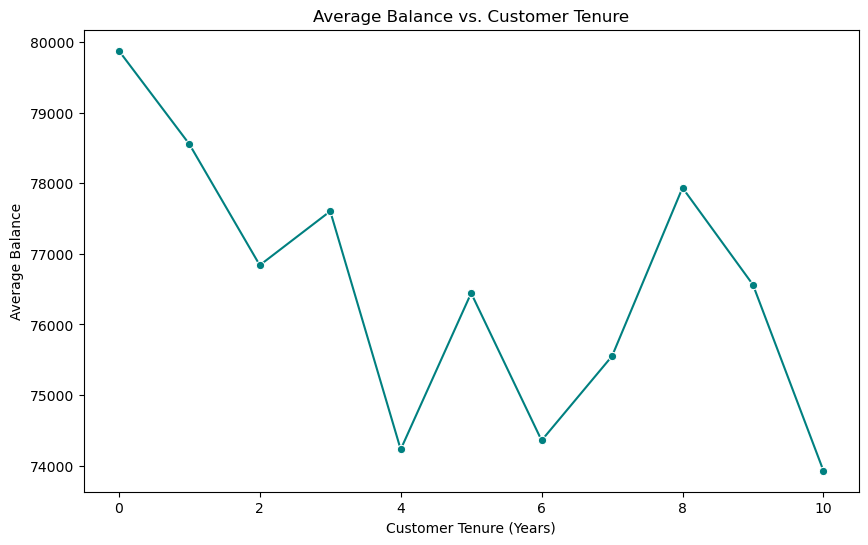

In [1485]:
# Plot Balance vs. Customer Tenure
plt.figure(figsize=(10, 6))
sb.lineplot(data=tenure_analysis, x='Tenure_x', y='Balance', marker='o', color='teal')
plt.title("Average Balance vs. Customer Tenure")
plt.xlabel("Customer Tenure (Years)")
plt.ylabel("Average Balance")
plt.show()

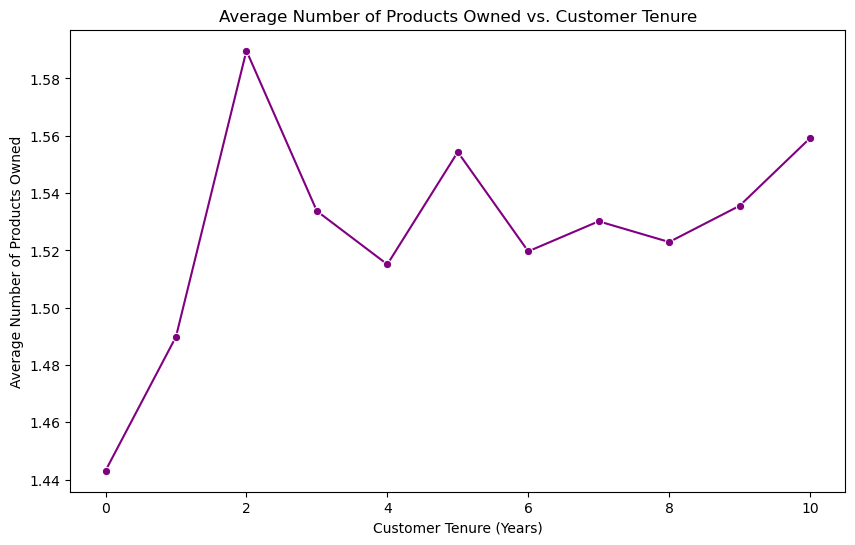

In [1487]:
# Plot Number of Products vs. Customer Tenure
plt.figure(figsize=(10, 6))
sb.lineplot(data=tenure_analysis, x='Tenure_x', y='NumOfProducts', marker='o', color='purple')
plt.title("Average Number of Products Owned vs. Customer Tenure")
plt.xlabel("Customer Tenure (Years)")
plt.ylabel("Average Number of Products Owned")
plt.show()

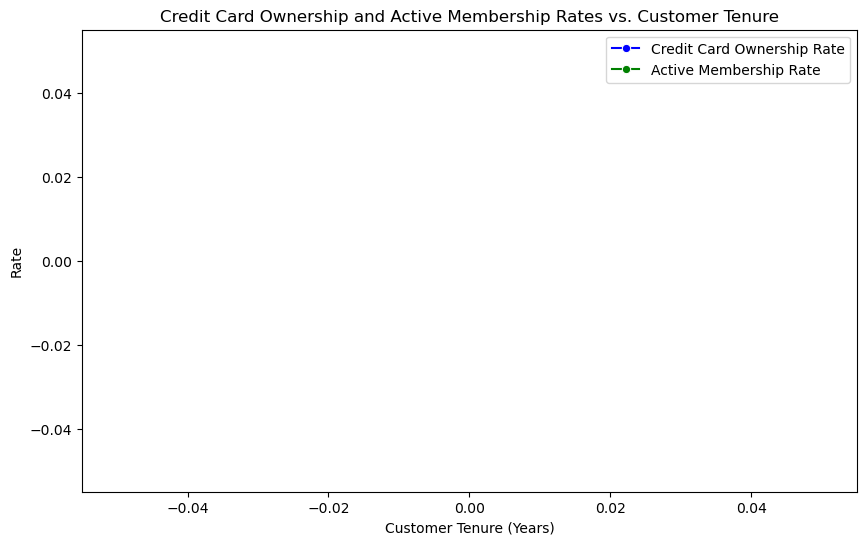

In [1489]:
# Plot HasCrCard and IsActiveMember vs. Customer Tenure

plt.figure(figsize=(10, 6))
sb.lineplot(data=tenure_analysis, x='Tenure_x', y='HasCrCard', marker='o', label='Credit Card Ownership Rate', color='blue')
sb.lineplot(data=tenure_analysis, x='Tenure_x', y='IsActiveMember', marker='o', label='Active Membership Rate', color='green')
plt.title("Credit Card Ownership and Active Membership Rates vs. Customer Tenure")
plt.xlabel("Customer Tenure (Years)")
plt.ylabel("Rate")
plt.legend()
plt.show()

In [1491]:
# Calculate credit card ownership rate by customer tenure

tenure_cc_rate = comb_Bank_Cust_Data.groupby('Tenure_x')['HasCrCard'].apply(lambda x: (x.eq('Yes').sum() / len(x)) * 100).reset_index(name='CreditCardOwnershipRate')

In [1493]:
tenure_cc_rate

,Tenure_x,CreditCardOwnershipRate
0,0,0.0
1,1,0.0
2,2,0.0
3,3,0.0
4,4,0.0
5,5,0.0
6,6,0.0
7,7,0.0
8,8,0.0
9,9,0.0


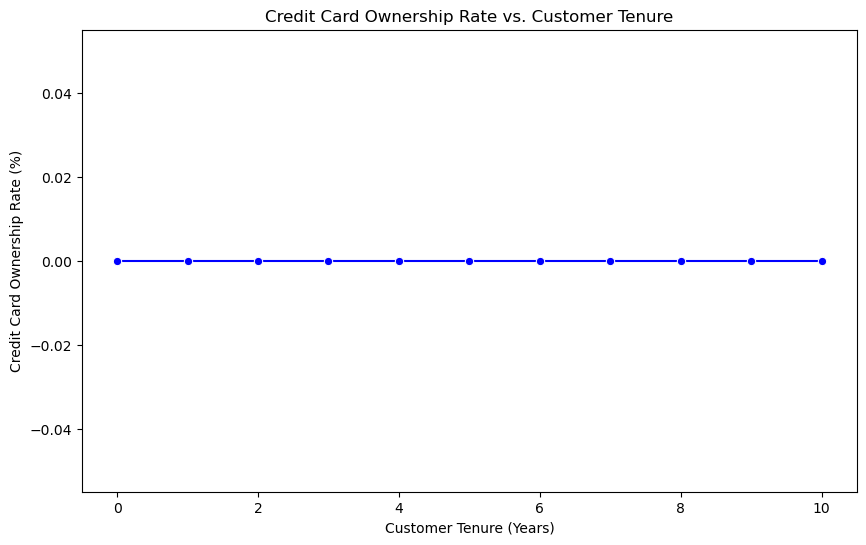

In [1495]:
# Plot Credit Card Ownership Rate vs. Customer Tenure


plt.figure(figsize=(10, 6))
sb.lineplot(data=tenure_cc_rate, x='Tenure_x', y='CreditCardOwnershipRate', marker='o', color='blue')
plt.title("Credit Card Ownership Rate vs. Customer Tenure")
plt.xlabel("Customer Tenure (Years)")
plt.ylabel("Credit Card Ownership Rate (%)")
plt.show()

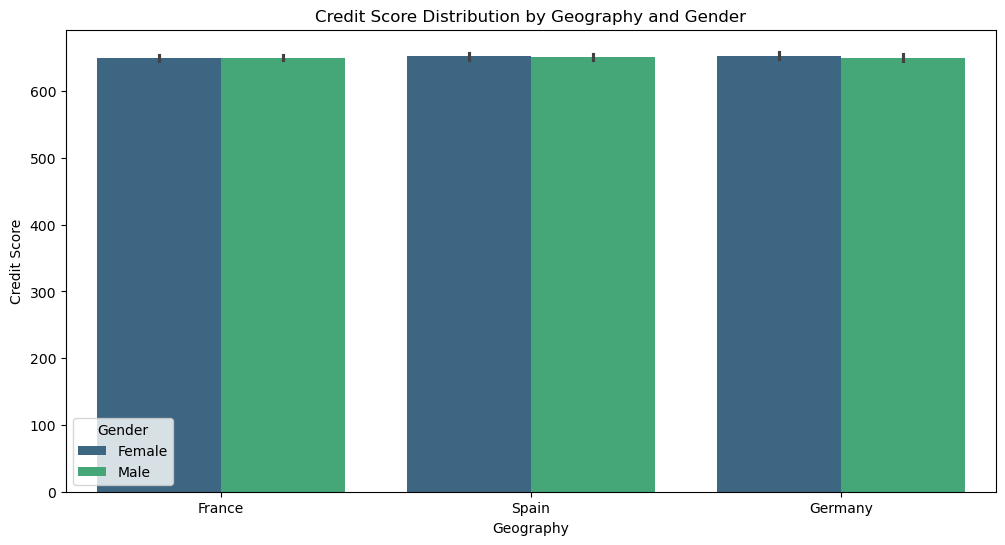

In [1497]:
# a. Distribution across Age, Gender, and Geography
plt.figure(figsize=(12, 6))
sb.barplot(data=comb_Bank_Cust_Data, x='Geography', y='CreditScore', hue='Gender', palette='viridis')
plt.title("Credit Score Distribution by Geography and Gender")
plt.xlabel("Geography")
plt.ylabel("Credit Score")
plt.show()

# Create 'Age_Category' column before plotting
# Define age ranges and labels for the categories

age_bins = [0, 30, 40, 50, 60, 70, 120]  # Adjust bins as needed
age_labels = ['<30', '30-39', '40-49', '50-59', '60-69', '70+']

# Create the 'Age_Category' column using pd.cut
comb_Bank_Cust_Data['Age_Category'] = pd.cut(comb_Bank_Cust_Data['Age'], bins=age_bins, labels=age_labels, right=False)

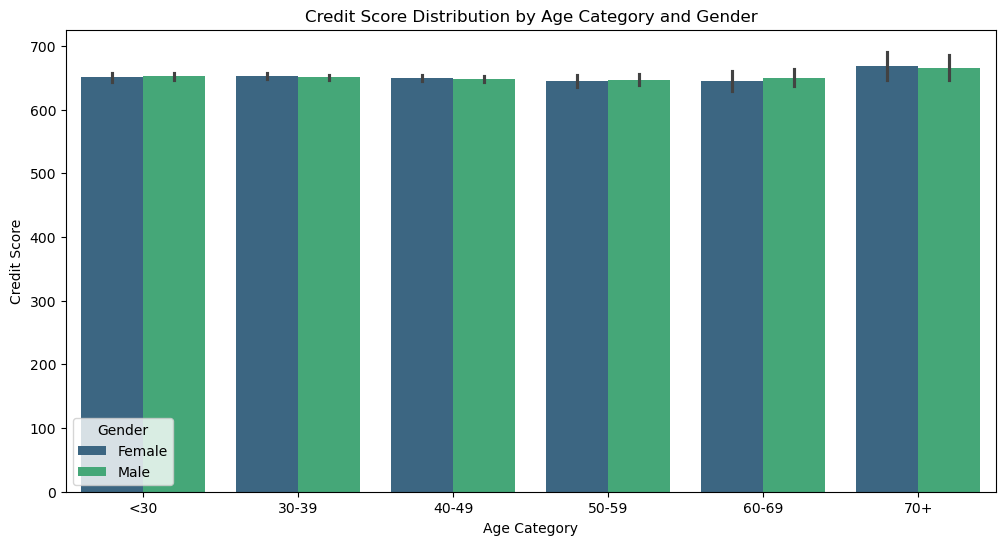

In [1499]:
plt.figure(figsize=(12, 6))
sb.barplot(data=comb_Bank_Cust_Data, x='Age_Category', y='CreditScore', hue='Gender', palette='viridis')  # Assuming you have an 'Age_Category' column
plt.title("Credit Score Distribution by Age Category and Gender")
plt.xlabel("Age Category")
plt.ylabel("Credit Score")
plt.show()

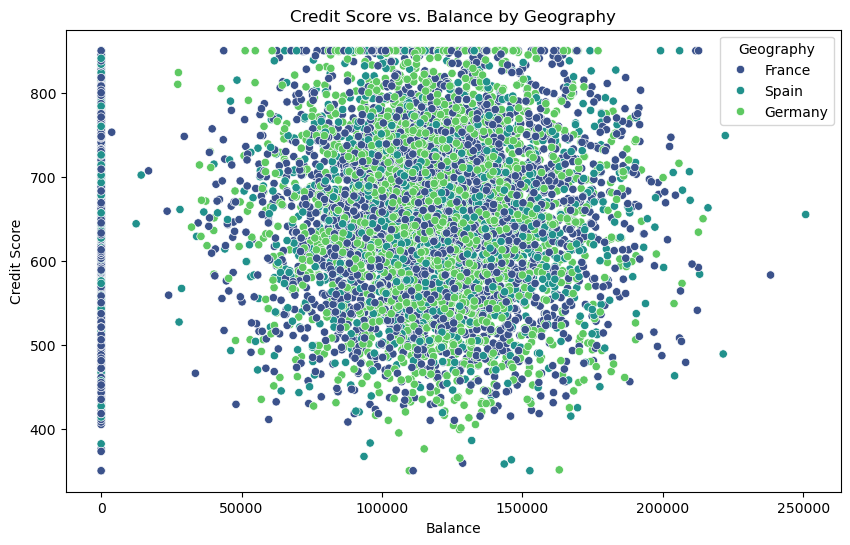

In [1501]:
# b. Correlation with Balance and Estimated Salary

plt.figure(figsize=(10, 6))
sb.scatterplot(data=comb_Bank_Cust_Data, x='Balance', y='CreditScore', hue='Geography', palette='viridis')
plt.title("Credit Score vs. Balance by Geography")
plt.xlabel("Balance")
plt.ylabel("Credit Score")
plt.show()

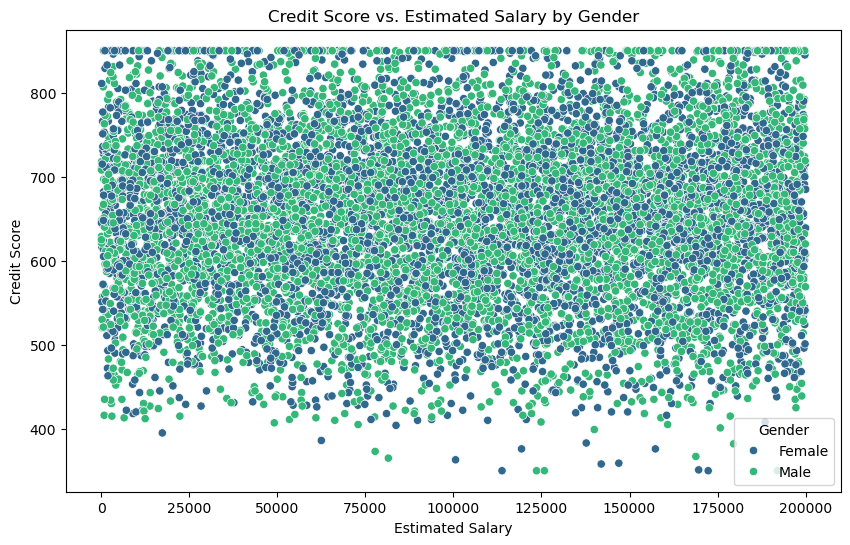

In [1503]:
plt.figure(figsize=(10, 6))
sb.scatterplot(data=comb_Bank_Cust_Data, x='EstimatedSalary', y='CreditScore', hue='Gender', palette='viridis')
plt.title("Credit Score vs. Estimated Salary by Gender")
plt.xlabel("Estimated Salary")
plt.ylabel("Credit Score")
plt.show()

# 3. Customer Balance and Estimated Salary Patterns

In [1505]:
# a. Average Balance and Salary by Demographic Groups

demographic_metrics = comb_Bank_Cust_Data.groupby(['Geography', 'Gender', 'Age_Category']).agg({
                     'Balance': 'mean',
                     'EstimatedSalary': 'mean'
                     }).reset_index()

C:\Users\Janny Fredericks\AppData\Local\Temp\ipykernel_12184\3377721090.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  demographic_metrics = comb_Bank_Cust_Data.groupby(['Geography', 'Gender', 'Age_Category']).agg({


# Visualizations

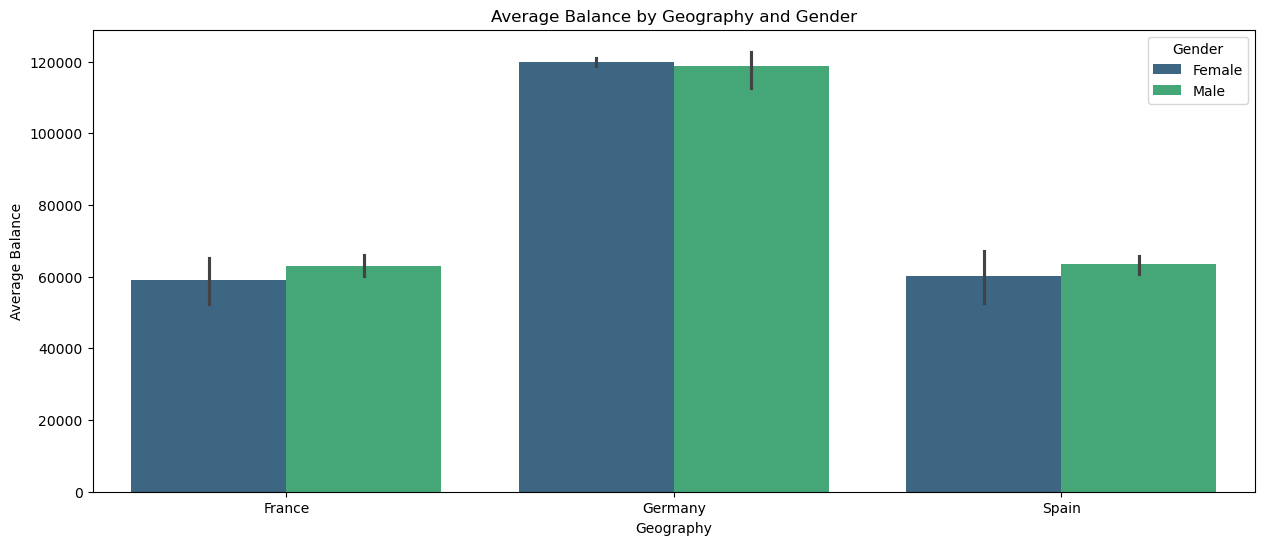

In [1507]:
plt.figure(figsize=(15, 6))
sb.barplot(data=demographic_metrics, x='Geography', y='Balance', hue='Gender', palette='viridis')
plt.title("Average Balance by Geography and Gender")
plt.xlabel("Geography")
plt.ylabel("Average Balance")
plt.show()

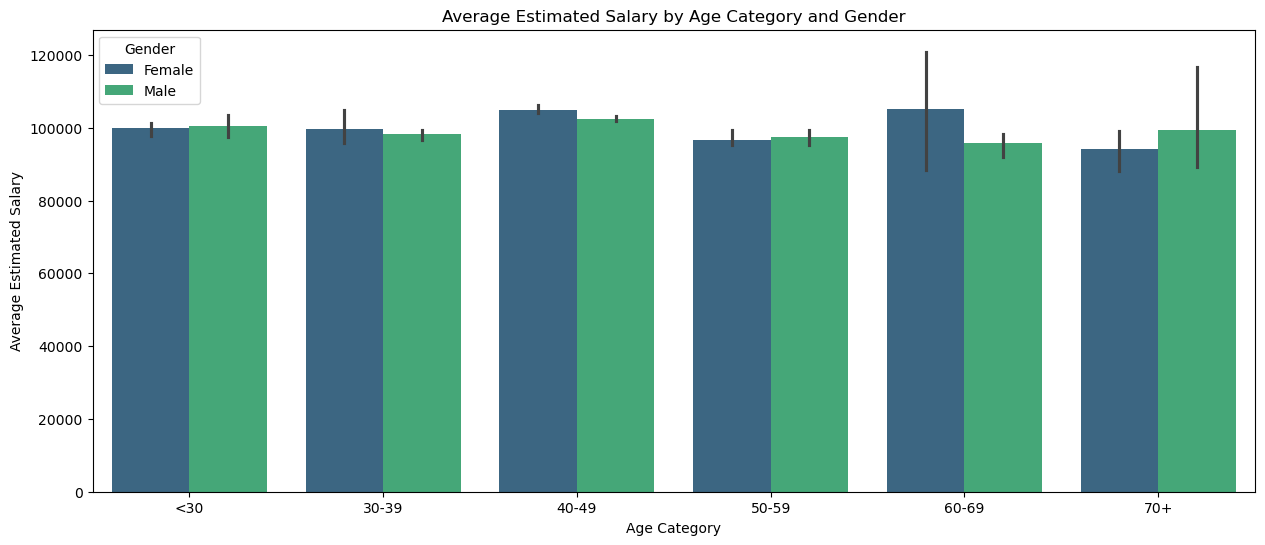

In [1509]:
plt.figure(figsize=(15, 6))
sb.barplot(data=demographic_metrics, x='Age_Category', y='EstimatedSalary', hue='Gender', palette='viridis')
plt.title("Average Estimated Salary by Age Category and Gender")
plt.xlabel("Age Category")
plt.ylabel("Average Estimated Salary")
plt.show()

In [1511]:
# Create 'Age_Category' column

age_bins = [0, 30, 40, 50, 60, 70, 120]  
age_labels = ['<30', '30-39', '40-49', '50-59', '60-69', '70+']
comb_Bank_Cust_Data['Age_Category'] = pd.cut(comb_Bank_Cust_Data['Age'], bins=age_bins, labels=age_labels, right=False)

## 4. Comparison of Financial and Demographic Characteristics**

In [1513]:
# Group data by 'Exited' status and calculate mean values

exited_vs_active = comb_Bank_Cust_Data.groupby('Exited').agg({
    'CreditScore': 'mean',
    'Age': 'mean',
    'Balance': 'mean',
    'EstimatedSalary': 'mean',
    'Tenure_x': 'mean',
    'NumOfProducts': 'mean',
    'HasCrCard': 'mean',  # Assuming 'HasCrCard' is 1 for Yes, 0 for No
    'IsActiveMember': 'mean'  # Assuming 'IsActiveMember' is 1 for Yes, 0 for No
}).reset_index()

In [1515]:
exited_vs_active

,Exited,CreditScore,Age,Balance,EstimatedSalary,Tenure_x,NumOfProducts,HasCrCard,IsActiveMember
0,0,651.927289,37.404621,72761.482327,99717.560856,5.033404,1.544267,NaN,NaN
1,1,645.338567,44.836605,91063.834460,101465.620221,4.931305,1.474975,NaN,NaN


In [1517]:
# Function to create comparison plots

def create_comparison_plot(feature, title, xlabel):
    plt.figure(figsize=(8, 5))
    sb.barplot(data=comb_Bank_Cust_Data, x='Exited', y=feature, palette='viridis')
    plt.title(title)
    plt.xticks([0, 1], ['Active', 'Exited']) 
    plt.xlabel(xlabel)
    plt.show()

C:\Users\Janny Fredericks\AppData\Local\Temp\ipykernel_12184\549237508.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(data=comb_Bank_Cust_Data, x='Exited', y=feature, palette='viridis')


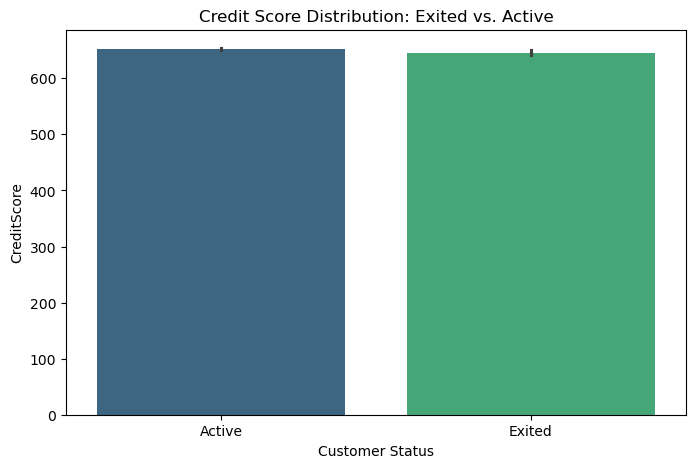

C:\Users\Janny Fredericks\AppData\Local\Temp\ipykernel_12184\549237508.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(data=comb_Bank_Cust_Data, x='Exited', y=feature, palette='viridis')


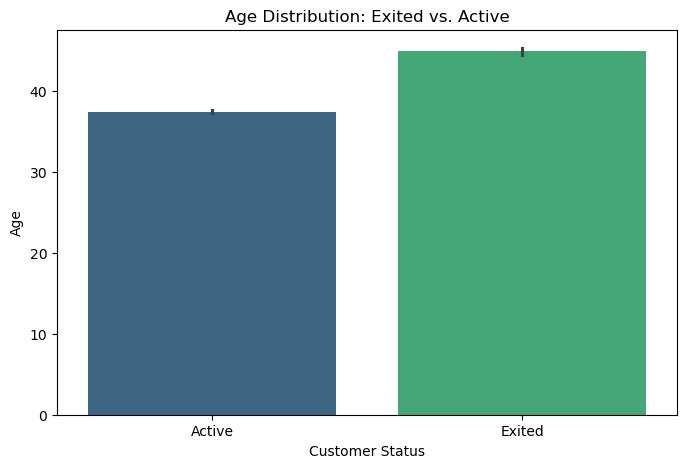

C:\Users\Janny Fredericks\AppData\Local\Temp\ipykernel_12184\549237508.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(data=comb_Bank_Cust_Data, x='Exited', y=feature, palette='viridis')


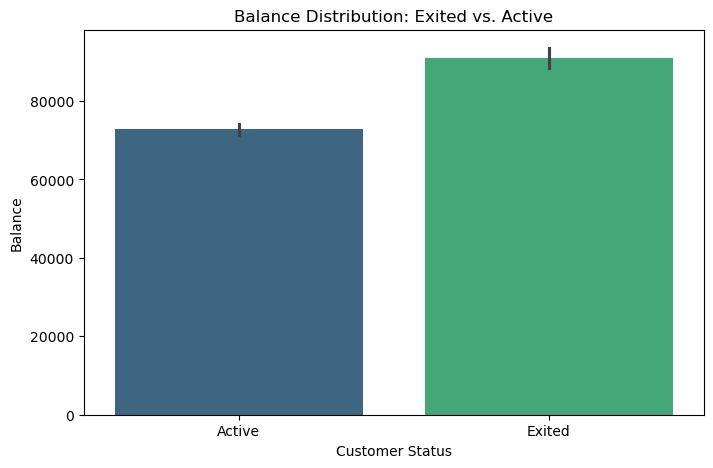

C:\Users\Janny Fredericks\AppData\Local\Temp\ipykernel_12184\549237508.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(data=comb_Bank_Cust_Data, x='Exited', y=feature, palette='viridis')


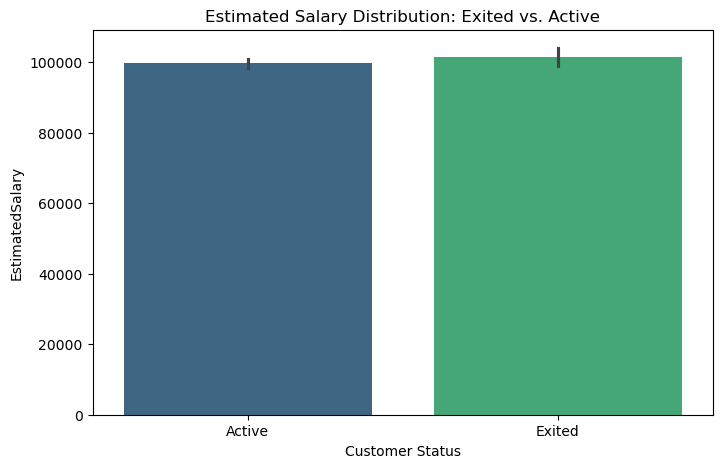

C:\Users\Janny Fredericks\AppData\Local\Temp\ipykernel_12184\549237508.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(data=comb_Bank_Cust_Data, x='Exited', y=feature, palette='viridis')


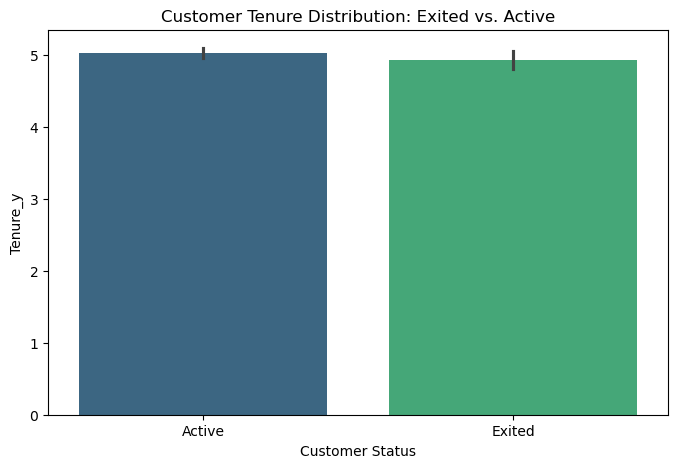

C:\Users\Janny Fredericks\AppData\Local\Temp\ipykernel_12184\549237508.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(data=comb_Bank_Cust_Data, x='Exited', y=feature, palette='viridis')


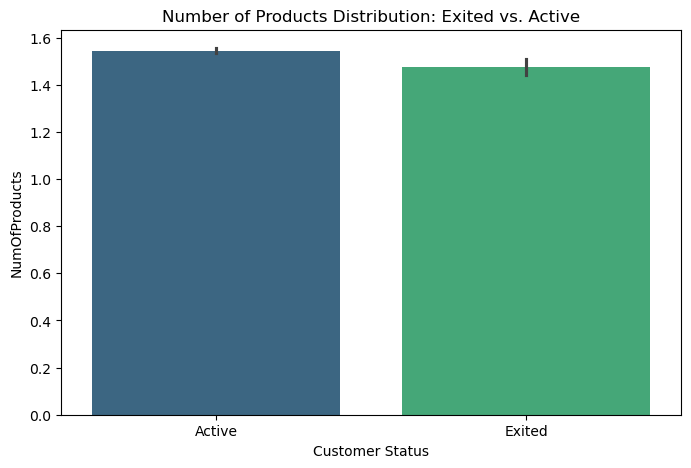

In [1519]:
# Create plots for different features

create_comparison_plot('CreditScore', "Credit Score Distribution: Exited vs. Active", "Customer Status")
create_comparison_plot('Age', "Age Distribution: Exited vs. Active", "Customer Status")
create_comparison_plot('Balance', "Balance Distribution: Exited vs. Active", "Customer Status")
create_comparison_plot('EstimatedSalary', "Estimated Salary Distribution: Exited vs. Active", "Customer Status")
create_comparison_plot('Tenure_y', "Customer Tenure Distribution: Exited vs. Active", "Customer Status")
create_comparison_plot('NumOfProducts', "Number of Products Distribution: Exited vs. Active", "Customer Status")

# Comparison of Categorical Features (Geography and Gender)

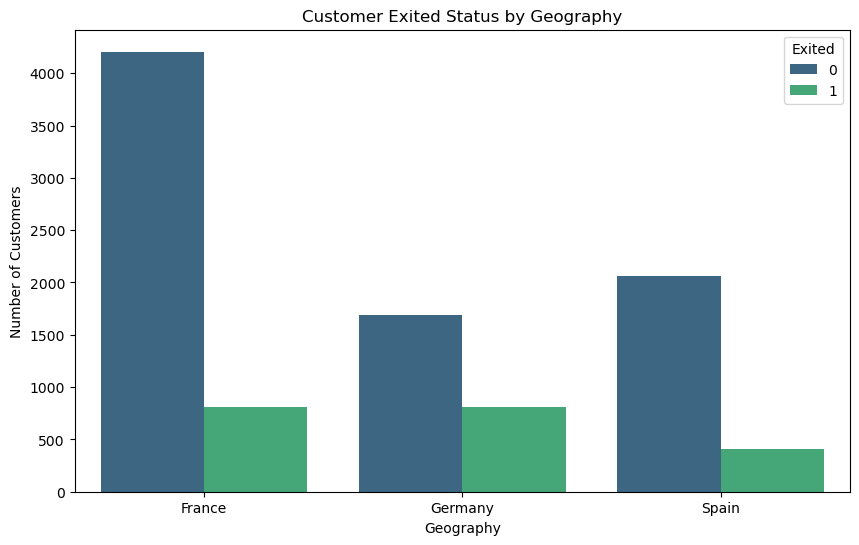

In [1521]:
# Geography

geography_exited = comb_Bank_Cust_Data.groupby(['Exited', 'Geography'])['CustomerId'].count().reset_index(name='Count')
plt.figure(figsize=(10, 6))
sb.barplot(data=geography_exited, x='Geography', y='Count', hue='Exited', palette='viridis')
plt.title("Customer Exited Status by Geography")
plt.xlabel("Geography")
plt.ylabel("Number of Customers")
plt.show()

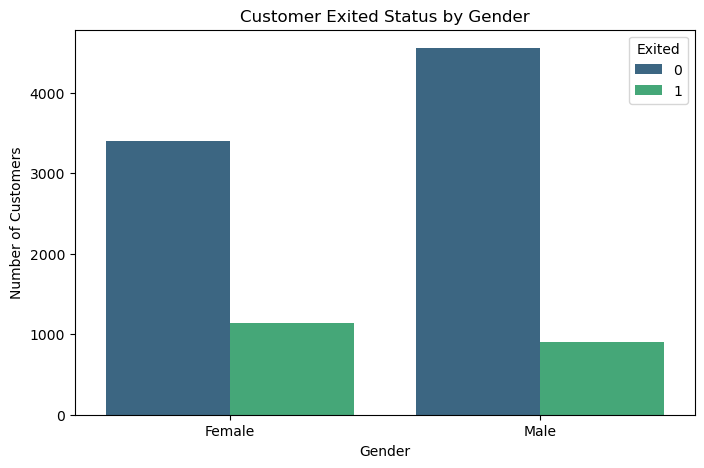

In [1523]:
# Gender

gender_exited = comb_Bank_Cust_Data.groupby(['Exited', 'Gender'])['CustomerId'].count().reset_index(name='Count')
plt.figure(figsize=(8, 5))
sb.barplot(data=gender_exited, x='Gender', y='Count', hue='Exited', palette='viridis')
plt.title("Customer Exited Status by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Customers")
plt.show()

# 5. Customer Segmentation

-distinct customer segments

In [1299]:
# Define the balance threshold

balance_threshold = 100000  # Example threshold for categorization

In [1326]:
##high_balance_customers = comb_Bank_Cust_Data.loc[comb_Bank_Cust_Data['Balance'] > 100000, 'Segment']
##low_balance_customers = comb_Bank_Cust_Data.loc[comb_Bank_Cust_Data['Balance'] <= 100000, 'Segment']

In [1525]:
comb_Bank_Cust_Data.loc[comb_Bank_Cust_Data['Balance'] > 100000, 'Segment'] = 'high_balance_customers'
comb_Bank_Cust_Data.loc[comb_Bank_Cust_Data['Balance'] < 100000, 'Segment'] = 'low_balance_customers'

In [1324]:
##high_balance_customers = comb_Bank_Cust_Data[comb_Bank_Cust_Data['Balance'] > 100000, 'Segment']
##low_balance_customers = comb_Bank_Cust_Data[comb_Bank_Cust_Data['Balance']<= 100000, 'Segment']

In [1527]:
high_balance_customers

3        High-Balance Customer
5        High-Balance Customer
6        High-Balance Customer
8        High-Balance Customer
9        High-Balance Customer
                 ...          
9994     High-Balance Customer
10000    High-Balance Customer
10001    High-Balance Customer
10002    High-Balance Customer
10003    High-Balance Customer
Name: Segment, Length: 4800, dtype: object

In [1529]:
low_balance_customers

0       Low-Balance Customer
1       Low-Balance Customer
2       Low-Balance Customer
4       Low-Balance Customer
7       Low-Balance Customer
                ...         
9995    Low-Balance Customer
9996    Low-Balance Customer
9997    Low-Balance Customer
9998    Low-Balance Customer
9999    Low-Balance Customer
Name: Segment, Length: 5201, dtype: object

C:\Users\Janny Fredericks\AppData\Local\Temp\ipykernel_12184\4293863335.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(data=comb_Bank_Cust_Data, x='Segment', palette='viridis')


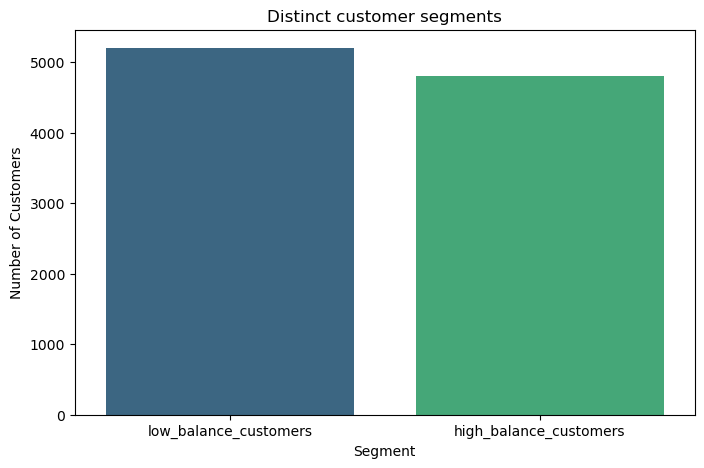

In [1531]:
plt.figure(figsize=(8, 5))
sb.countplot(data=comb_Bank_Cust_Data, x='Segment', palette='viridis')
plt.title( "Distinct customer segments")
plt.xlabel("Segment")
plt.ylabel("Number of Customers")
plt.show()

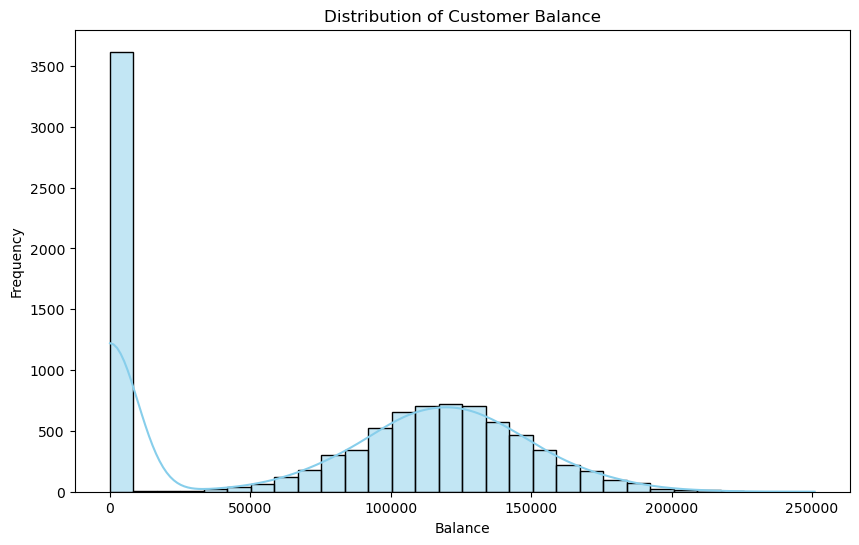

In [1533]:
# Plot histogram to visualize the distribution
plt.figure(figsize=(10, 6))
sb.histplot(comb_Bank_Cust_Data['Balance'], kde=True, bins=30, color='skyblue')
plt.title("Distribution of Customer Balance")
plt.xlabel("Balance")
plt.ylabel("Frequency")
plt.show()

In [1535]:
# Group data by 'BalanceSegment' and calculate mean values of relevant features
segment_characteristics = comb_Bank_Cust_Data.groupby('Segment').agg({
    'Age': 'mean',
    'CreditScore': 'mean',
    'EstimatedSalary': 'mean',
    'Tenure_x': 'mean',
    'NumOfProducts': 'mean',
    'HasCrCard': 'mean',
    # 'IsActiveMember': 'mean',  # Removed to avoid TypeError
    'Exited': 'mean'  # Churn rate
}).reset_index()

In [1537]:
segment_characteristics 

,Segment,Age,CreditScore,EstimatedSalary,Tenure_x,NumOfProducts,HasCrCard,Exited
0,high_balance_customers,39.180625,650.850833,100672.050181,5.002292,1.385208,NaN,0.252292
1,low_balance_customers,38.677754,650.338973,99521.636270,5.022111,1.663911,NaN,0.159008


In [1539]:
def create_segment_comparison_plot(feature, title, xlabel):
    plt.figure(figsize=(8, 5))
    sb.barplot(data=comb_Bank_Cust_Data, x='Segment', y=feature, palette='viridis')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel("Average Value")
    plt.show()

C:\Users\Janny Fredericks\AppData\Local\Temp\ipykernel_12184\1702097849.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(data=comb_Bank_Cust_Data, x='Segment', y=feature, palette='viridis')


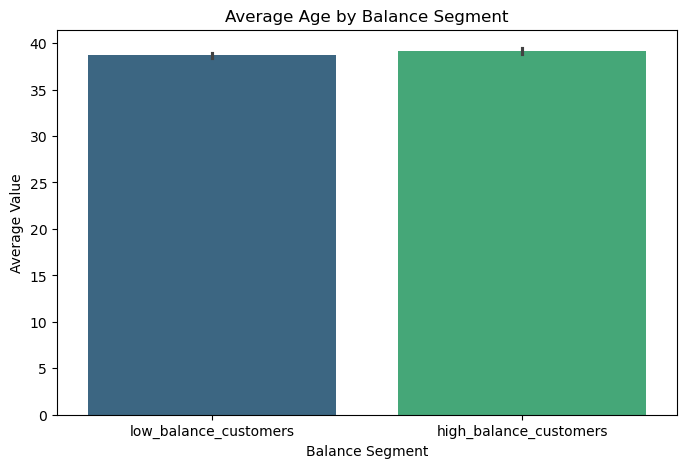

C:\Users\Janny Fredericks\AppData\Local\Temp\ipykernel_12184\1702097849.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(data=comb_Bank_Cust_Data, x='Segment', y=feature, palette='viridis')


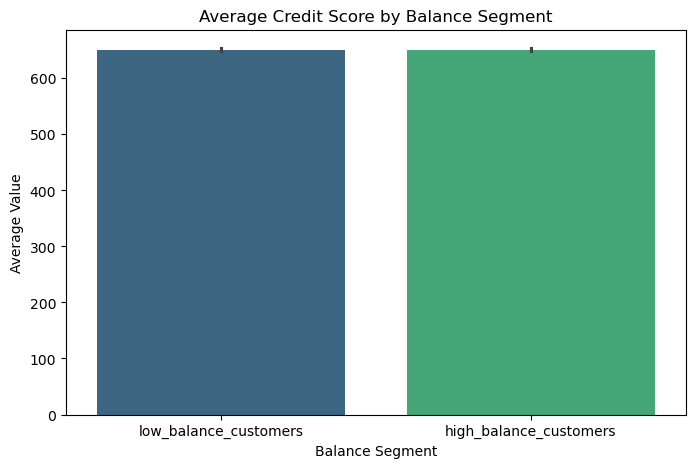

C:\Users\Janny Fredericks\AppData\Local\Temp\ipykernel_12184\1702097849.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(data=comb_Bank_Cust_Data, x='Segment', y=feature, palette='viridis')


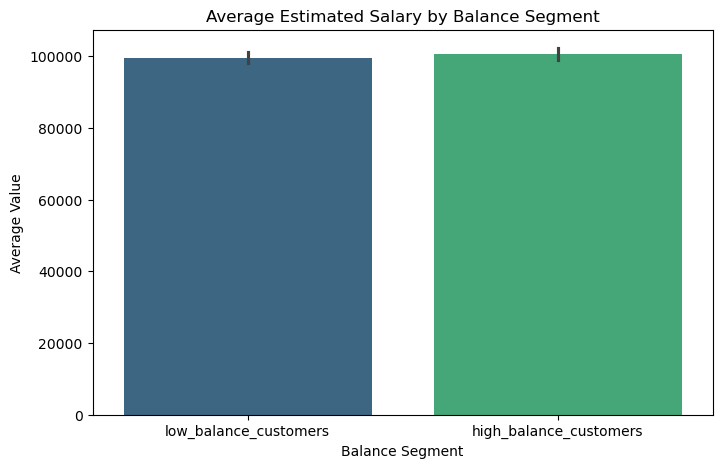

C:\Users\Janny Fredericks\AppData\Local\Temp\ipykernel_12184\1702097849.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(data=comb_Bank_Cust_Data, x='Segment', y=feature, palette='viridis')


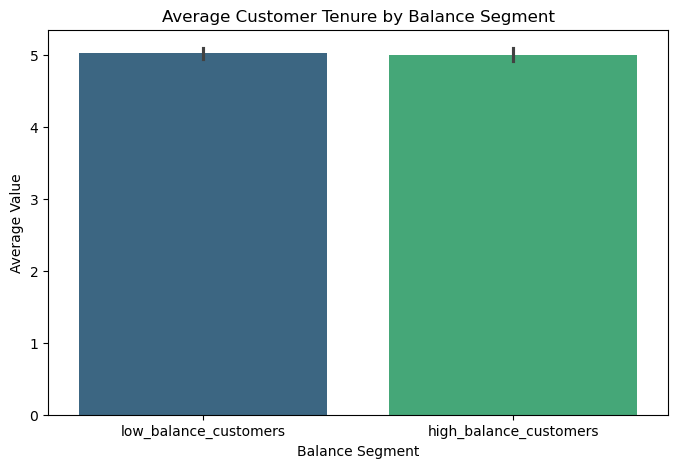

C:\Users\Janny Fredericks\AppData\Local\Temp\ipykernel_12184\1702097849.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(data=comb_Bank_Cust_Data, x='Segment', y=feature, palette='viridis')


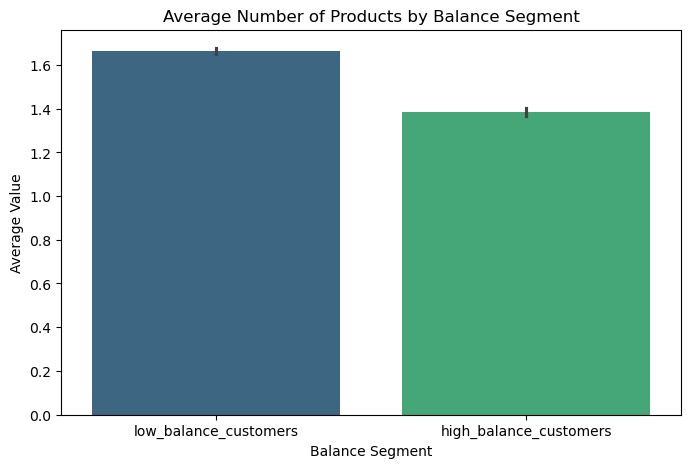

C:\Users\Janny Fredericks\AppData\Local\Temp\ipykernel_12184\1702097849.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(data=comb_Bank_Cust_Data, x='Segment', y=feature, palette='viridis')


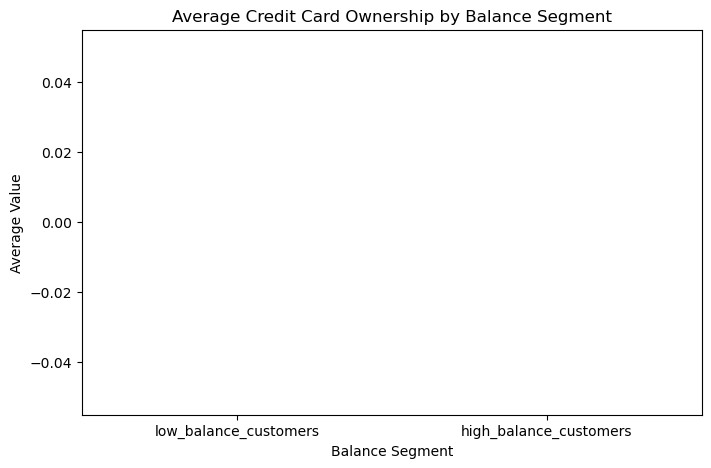

C:\Users\Janny Fredericks\AppData\Local\Temp\ipykernel_12184\1702097849.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(data=comb_Bank_Cust_Data, x='Segment', y=feature, palette='viridis')


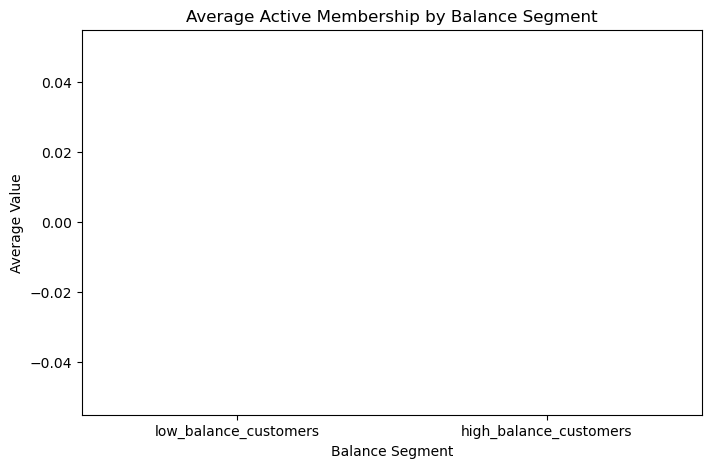

C:\Users\Janny Fredericks\AppData\Local\Temp\ipykernel_12184\1702097849.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(data=comb_Bank_Cust_Data, x='Segment', y=feature, palette='viridis')


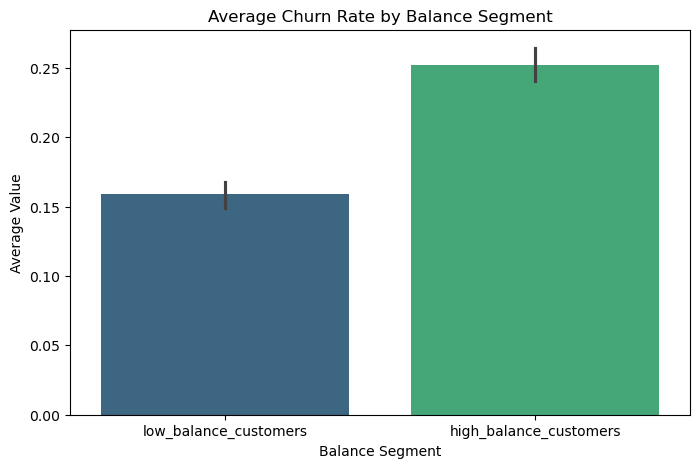

In [1541]:
create_segment_comparison_plot('Age', "Average Age by Balance Segment", "Balance Segment")
create_segment_comparison_plot('CreditScore', "Average Credit Score by Balance Segment", "Balance Segment")
create_segment_comparison_plot('EstimatedSalary', "Average Estimated Salary by Balance Segment", "Balance Segment")
create_segment_comparison_plot('Tenure_x', "Average Customer Tenure by Balance Segment", "Balance Segment")
create_segment_comparison_plot('NumOfProducts', "Average Number of Products by Balance Segment", "Balance Segment")
create_segment_comparison_plot('HasCrCard', "Average Credit Card Ownership by Balance Segment", "Balance Segment")
create_segment_comparison_plot('IsActiveMember', "Average Active Membership by Balance Segment", "Balance Segment")
create_segment_comparison_plot('Exited', "Average Churn Rate by Balance Segment", "Balance Segment")